# Forecasting(cococola)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [2]:
coke=pd.read_excel("CocaCola_Sales_Rawdata (1).xlsx",
                    index_col=0, 
                    parse_dates=True)
coke


,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
coke.info()



<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [4]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:ylabel='Density'>

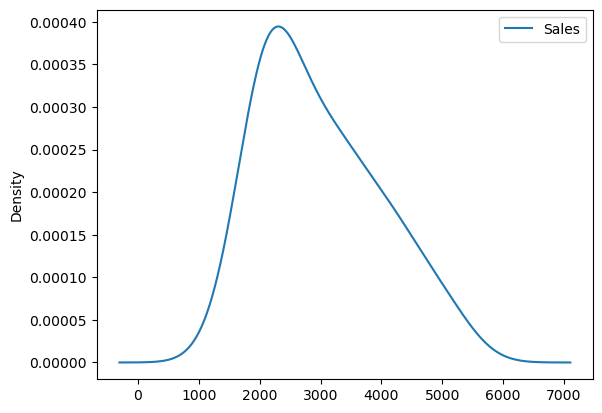

In [5]:
#Histogram and Density Plots
# create a density plot
coke.plot(kind='kde')


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

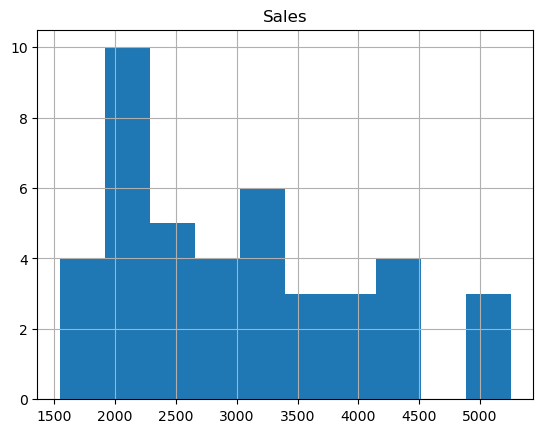

In [6]:
# create a histogram plot
coke.hist()



<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

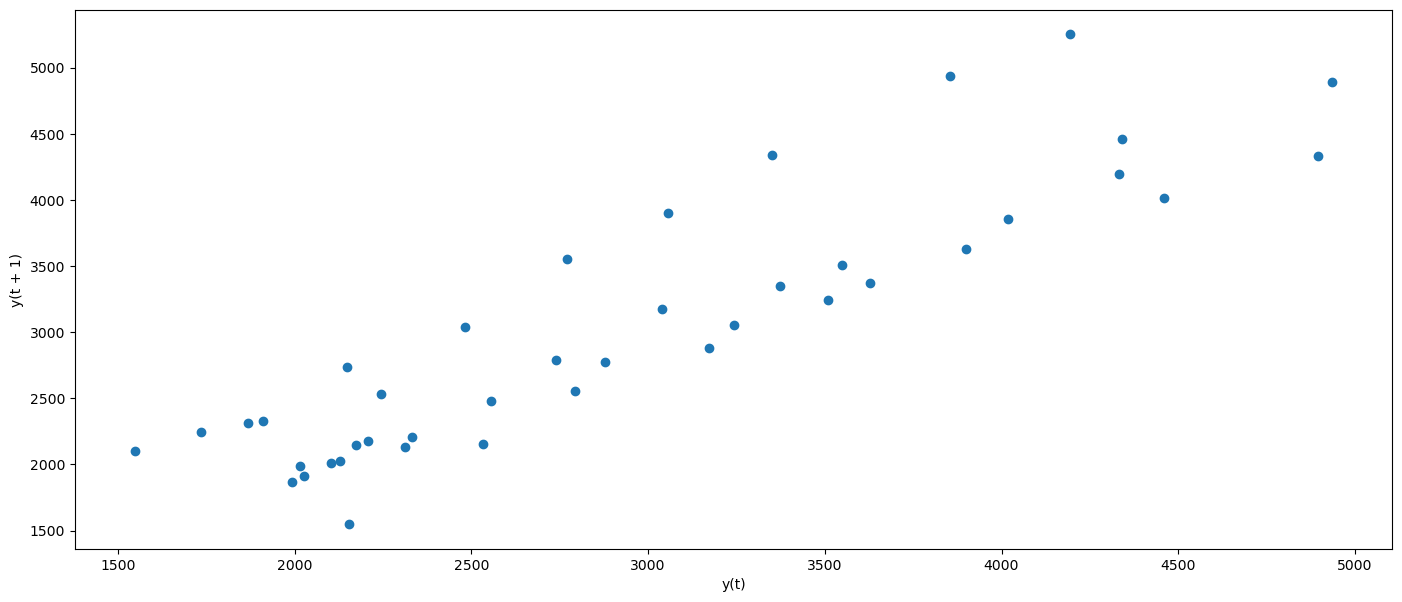

In [7]:
#Lag plot
# create a scatter plot
plt.figure(figsize = (17,7))
pd.plotting.lag_plot(coke)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

<Figure size 5000x1500 with 0 Axes>

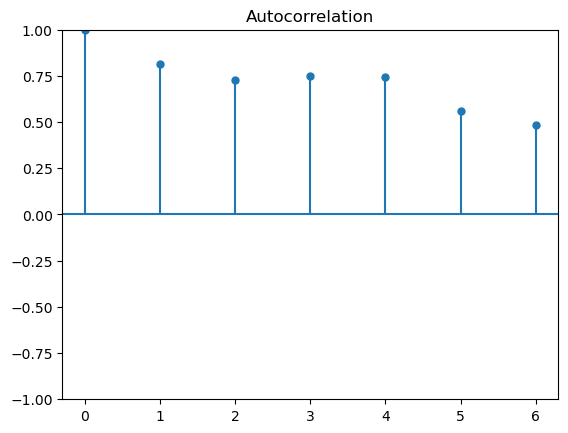

In [8]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (50,15))
plot_acf(coke, lags=6)
plt.show()


In [10]:
#Box and Whisker Plots by Interval
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
coke


C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\456554989.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [11]:
type(coke)


pandas.core.series.Series

In [13]:
#Sampling and Basic Transformations
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
coke

C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\3093471560.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [14]:
coke.shape


(42,)

In [15]:
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")


In [16]:
quarter =['Q1','Q2','Q3','Q4']


In [17]:
p = coke["Quarter"][0]
p[0:2]
coke['quarter']= 0

for i in range(42):
    p = coke["Quarter"][i]
    coke['quarter'][i]= p[0:2]

coke


C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\2878894342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coke['quarter'][i]= p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [18]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coke['quarter']))
quarter_dummies


,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [20]:
coke=pd.concat([coke,quarter_dummies],axis=1)
coke



,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0,0,1,0,0


In [22]:

# Complete the dataset
coke['t']=np.arange(1,43)
coke['t_square']=np.square(coke.t)
coke['log_Sales']=np.log(coke.Sales)
coke

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,0,1,0,0,10,100,7.746574


In [23]:
#Forecasting - Model Based Methods
coke

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,0,1,0,0,10,100,7.746574


<AxesSubplot:>

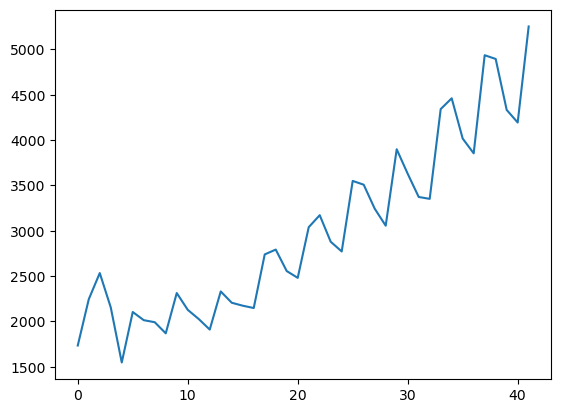

In [24]:
coke['Sales'].plot()


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

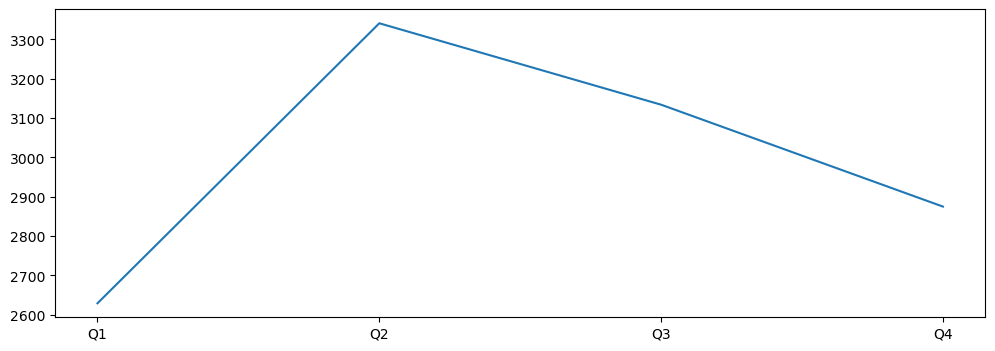

In [25]:
plt.figure(figsize=(12,4))
sns.lineplot(x="quarter",y="Sales",data=coke)



In [26]:
#Splitting data
coke


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,0,1,0,0,10,100,7.746574


In [27]:
# For self understanding of forecasting values data split into multiples of 12
Train = coke.head(25)
Test = coke.tail(7)
Train


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,0,1,0,0,10,100,7.746574


In [28]:
Test



,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,Q4,0,0,0,1,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,0,1,0,0,42,1764,8.566555


In [29]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


1191.9149910119424

In [30]:
#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

985.899754530735

In [31]:
#Quadratic 
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

825.0423176019381

In [32]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2223.0393341466033

In [33]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1167.8830159279275

In [34]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2249.1183555973284

In [35]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

855.10818512615

In [36]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.079135663087

In [37]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,825.042318
6,rmse_Mult_add_sea,855.108185
1,rmse_Exp,985.899755
4,rmse_add_sea_quad,1167.883016
0,rmse_linear,1191.914991
3,rmse_add_sea,2223.039334
5,rmse_Mult_sea,2249.118356


In [39]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coke).fit()

model_full

In [40]:
pred_new  = pd.Series(model_full.predict(coke))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [41]:
coke["forecasted_Sales"] = pd.Series(np.exp(pred_new))



C:\Users\RAMA KRISHNA\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


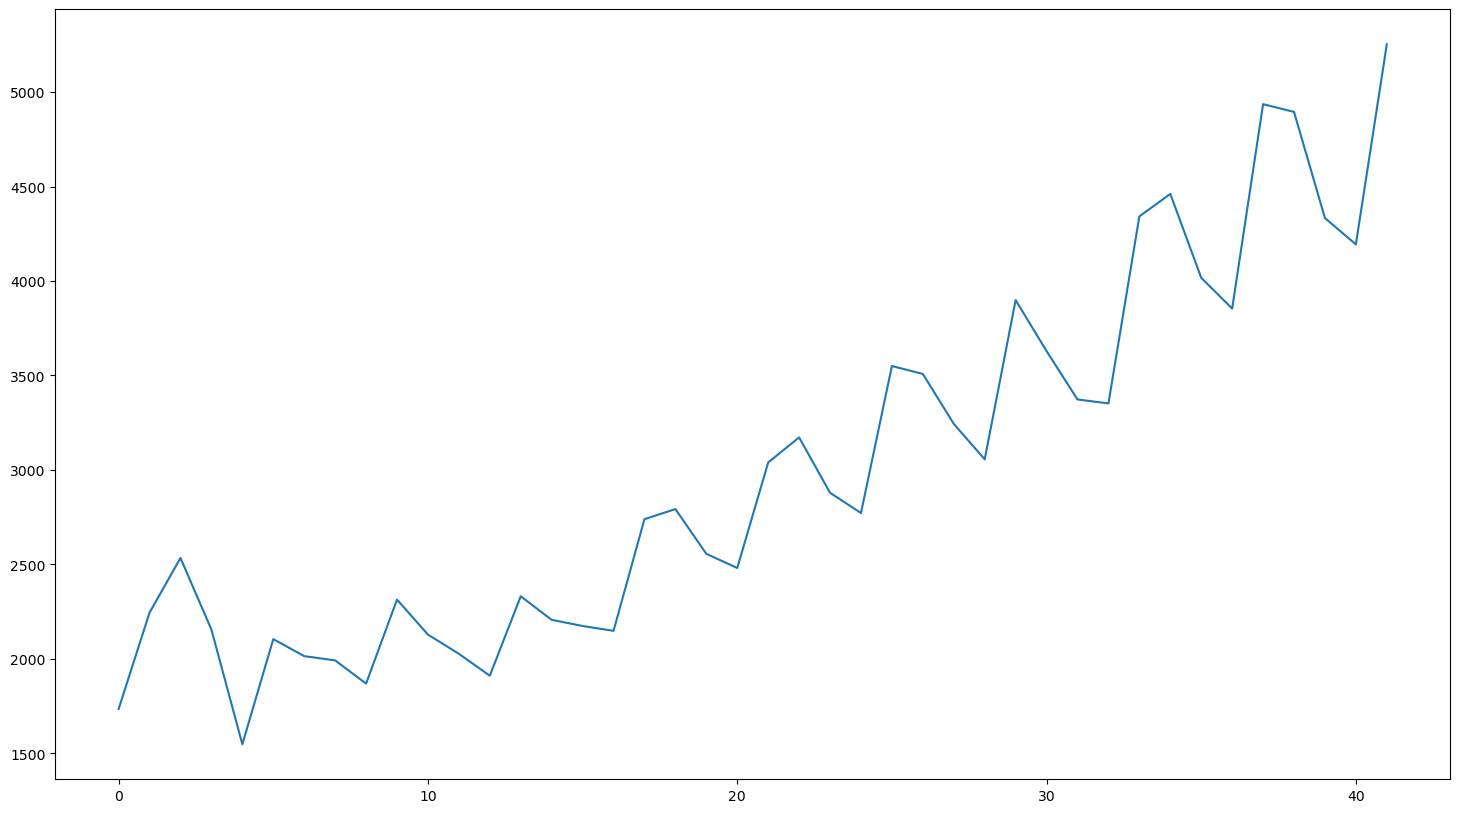

In [42]:
plt.figure(figsize=(18,10))
plt.plot(coke[['Sales','forecasted_Sales']].reset_index(drop=True))


In [43]:
#Splitting data
Train = coke.head(35)
Test = coke.tail(7)


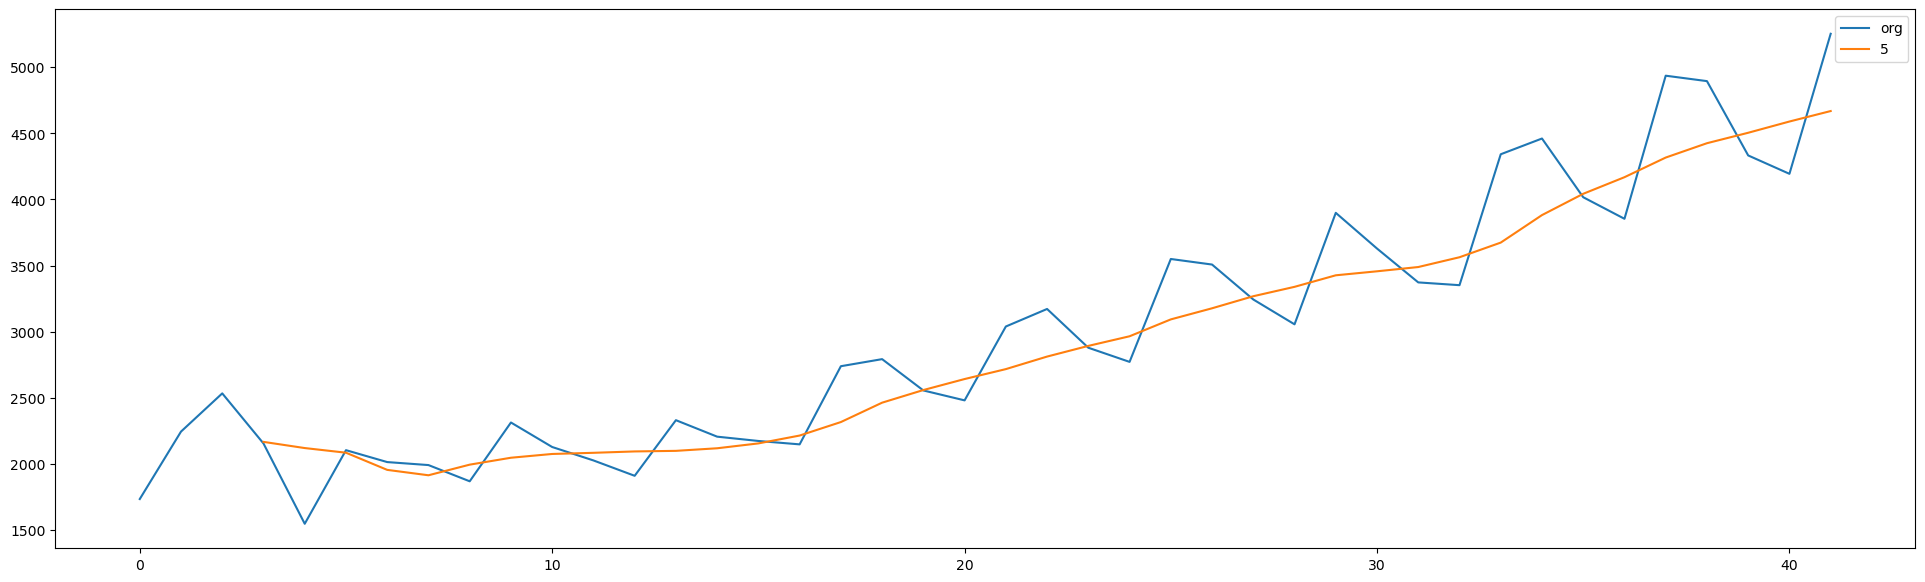

In [44]:
#Moving Average
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
coke["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')

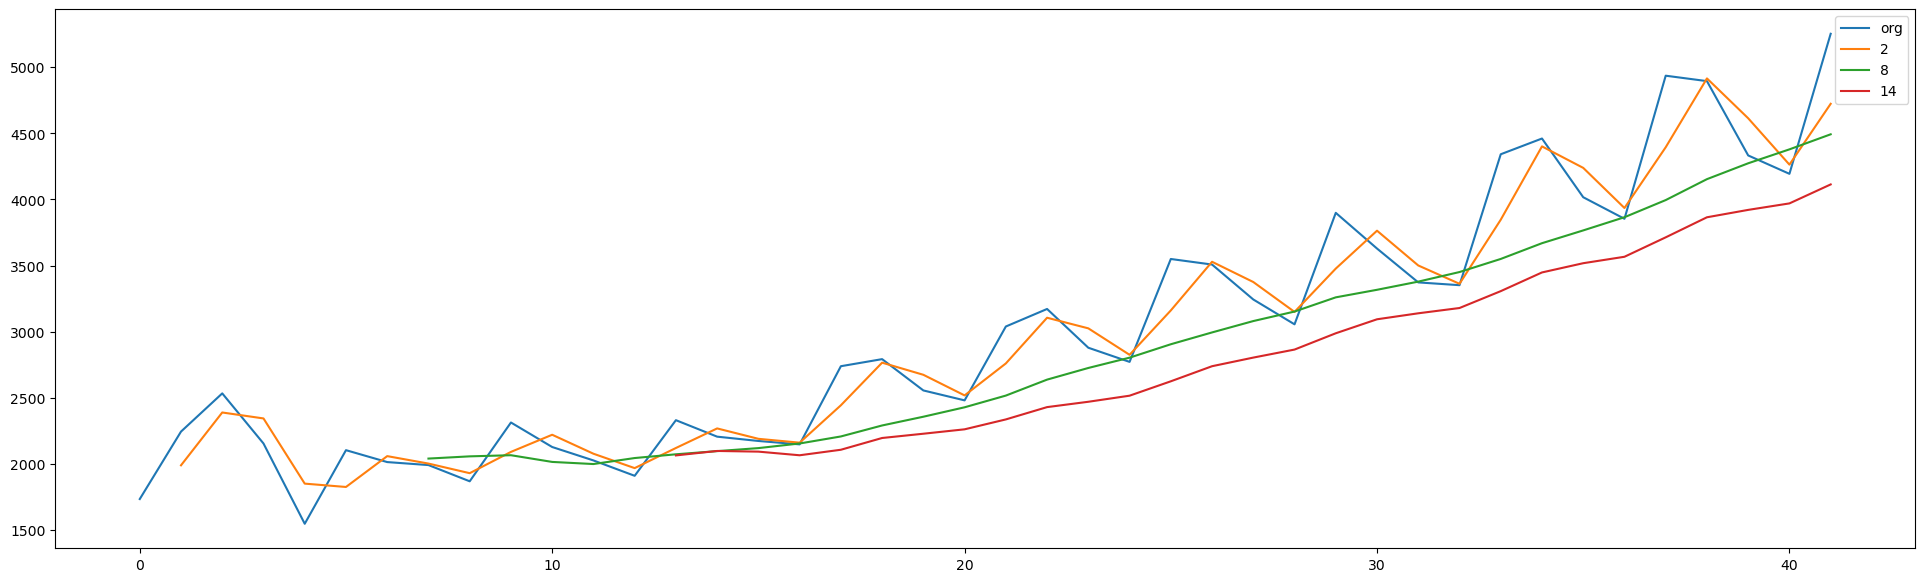

In [45]:
plt.figure(figsize=(24,7))
coke['Sales'].plot(label="org")
for i in range(2,18,6):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


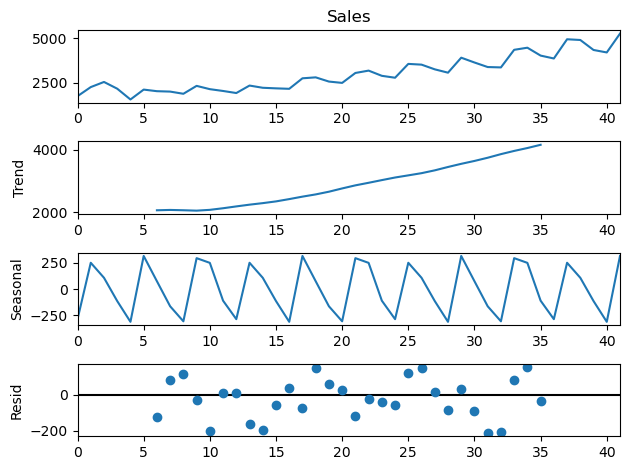

In [46]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(coke['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

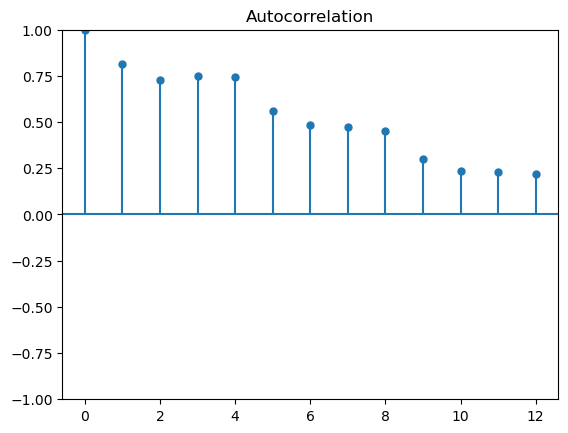

In [47]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()


In [50]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [51]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

16.401825273142318

In [52]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\1203248103.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


15.891434335419715

In [53]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.241832544936149

In [54]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.692103335212899

In [55]:
#Final Model by combining train and test
hwe_model_mul_add = ExponentialSmoothing(coke["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
#Forecasting for next 7 time periods
hwe_model_mul_add.forecast(7)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
dtype: float64

# Forecasting(airlines)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [57]:
df = pd.read_excel('Airlines+Data.xlsx',
                       index_col=0, 
                       parse_dates=['Month'])
df


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


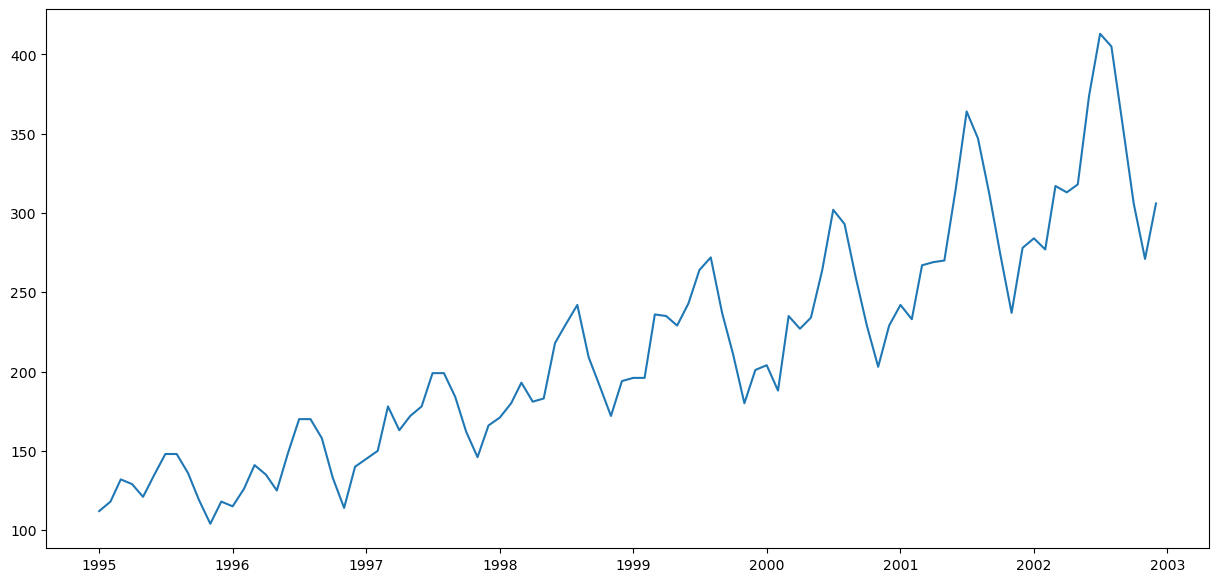

In [58]:
plt.figure(figsize = (15,7))
plt.plot(df)

In [59]:
df = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
df



,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

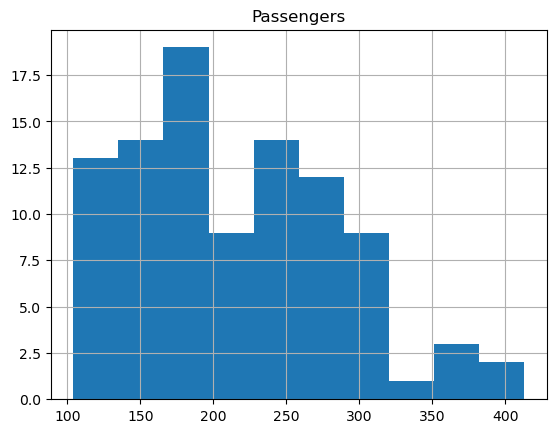

In [62]:
#Histogram and Density Plots
# create a histogram plot
df.hist()


<AxesSubplot:ylabel='Density'>

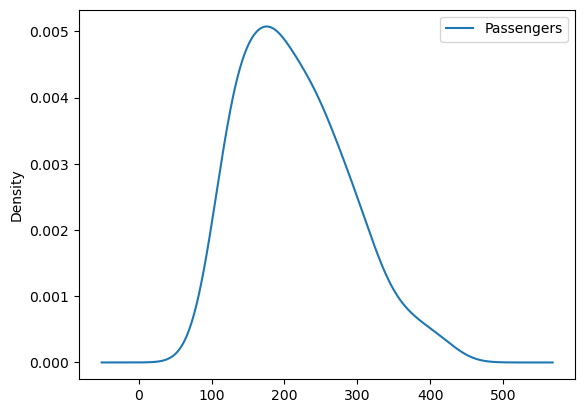

In [63]:
# create a density plot
df.plot(kind='kde')

In [68]:
df = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
df

C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\1378012135.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [70]:
# Grouping by Year
groups = df.groupby(pd.Grouper(freq='A'))
groups


In [71]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

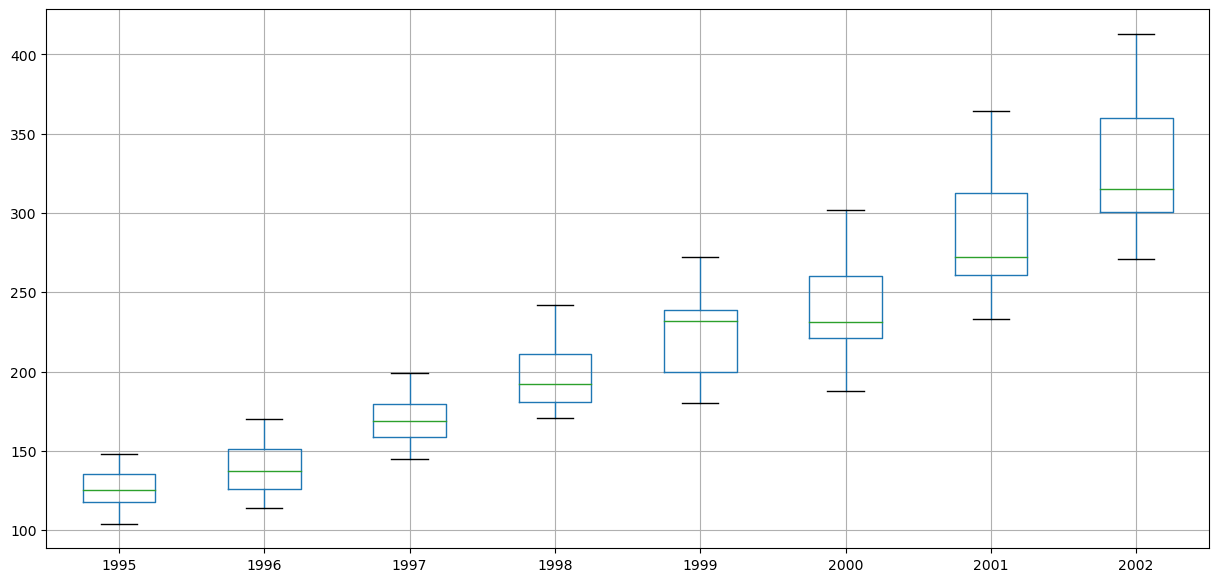

In [72]:
plt.figure(figsize = (15,7))
years.boxplot()


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

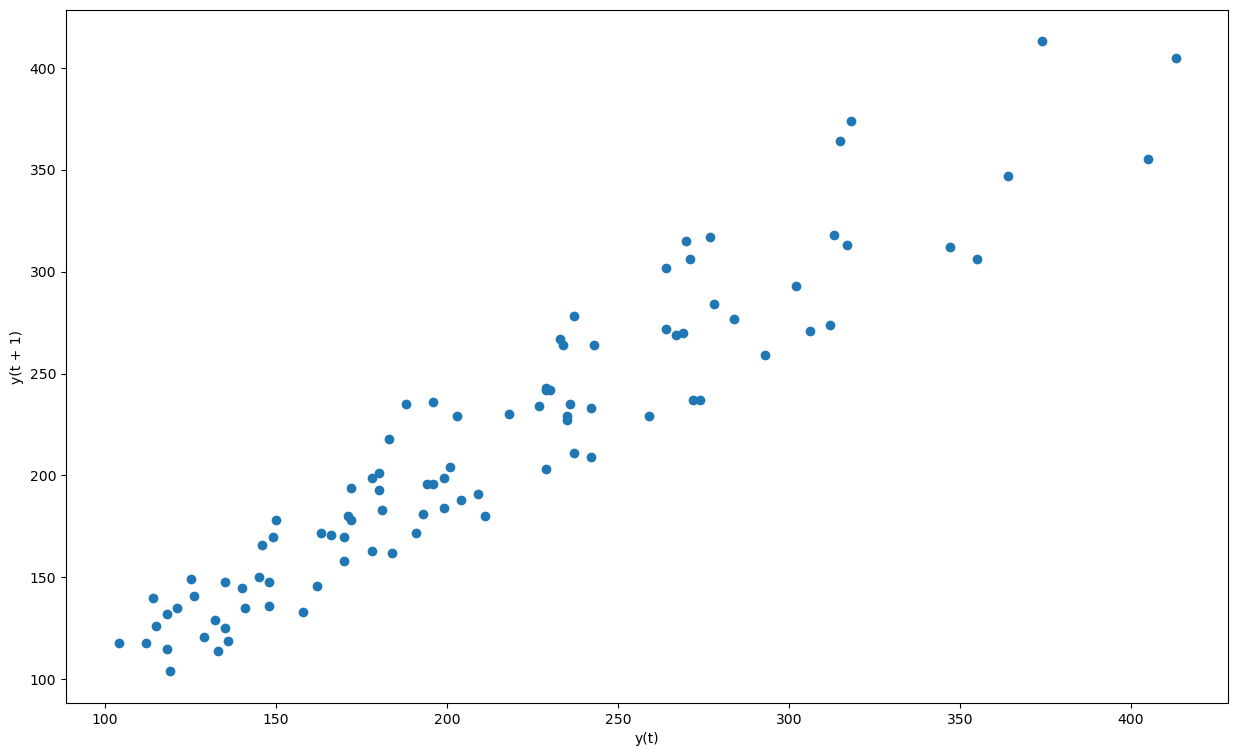

In [73]:
#Lag plot
# create a scatter plot
plt.figure(figsize = (15,9))
pd.plotting.lag_plot(df)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

<Figure size 3200x2000 with 0 Axes>

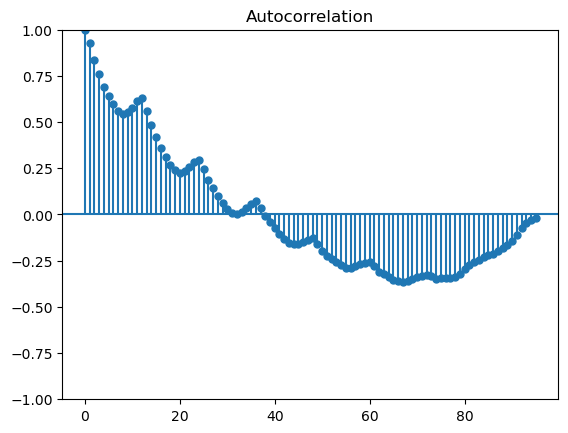

In [75]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (32,20))
plot_acf(df, lags=95)
plt.show()



In [76]:
#Sampling and Basic Transformations
#Upsampling Data
df = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
df

C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\1165961380.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [77]:
df.shape

upsampled = df.resample('D').mean()
upsampled.head(20)


Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [78]:
#Interpolate the Missing Value
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)


Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

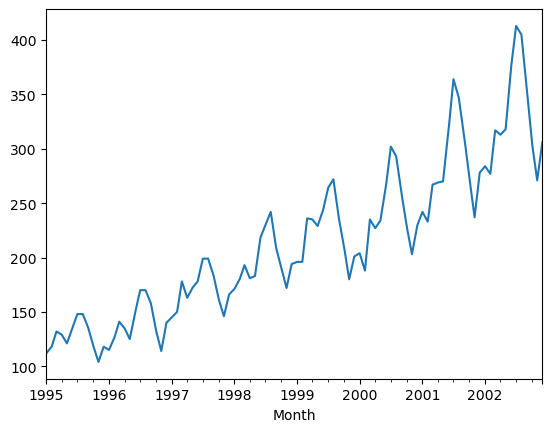

In [79]:
interpolated.plot()



<AxesSubplot:xlabel='Month'>

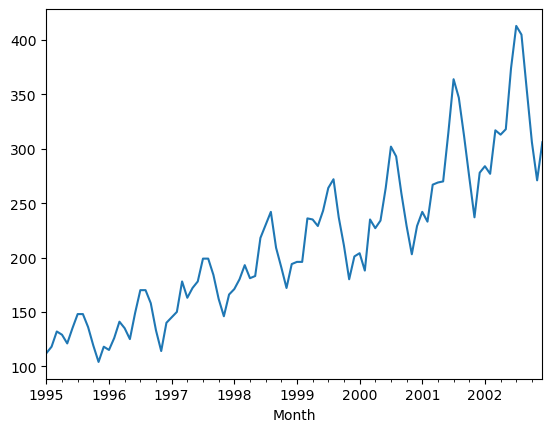

In [80]:
df.plot()



<AxesSubplot:xlabel='Month'>

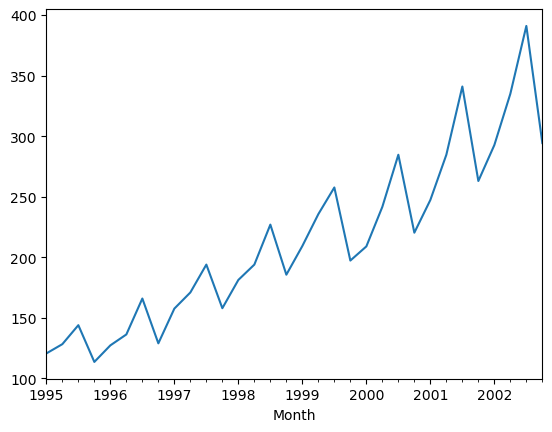

In [85]:
#Downsampling Data
# downsample to quarterly intervals
resample = df.resample('Q')
quarterly_mean_sales = resample.mean()
quarterly_mean_sales.plot()


In [86]:
#Tranformations
# load and plot a time series
df=pd.read_excel("Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


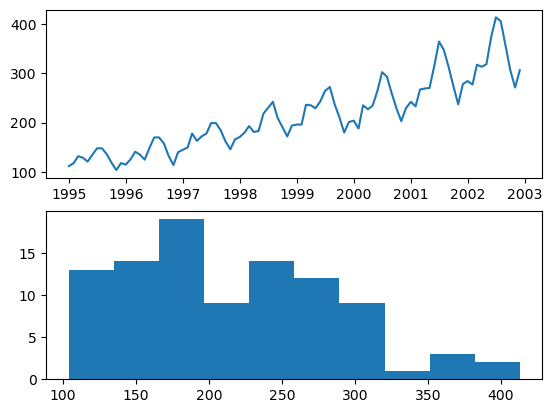

In [88]:
# line plot
plt.subplot(211)
plt.plot(df)

# histogram
plt.subplot(212)
plt.hist(df)

plt.show()



In [89]:
#Log Transform
dataframe = pd.DataFrame(np.log(df.values), columns = ['Passengers'])
dataframe


,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


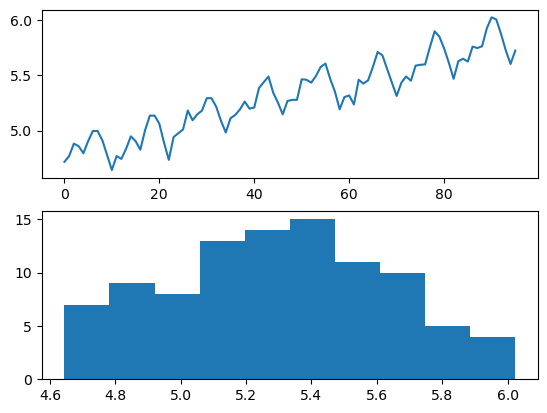

In [90]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()


In [91]:
quarterly_mean_sales.head()



Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [92]:
#Square Root Transform
dataframe = pd.DataFrame(np.sqrt(df.values), columns = ['Passengers'])
dataframe


,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


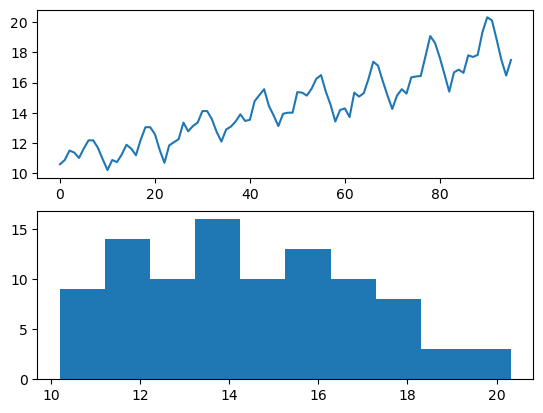

In [93]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()



In [94]:
#Forecasting - Model Based Methods
df=pd.read_excel("Airlines+Data.xlsx")
df



,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

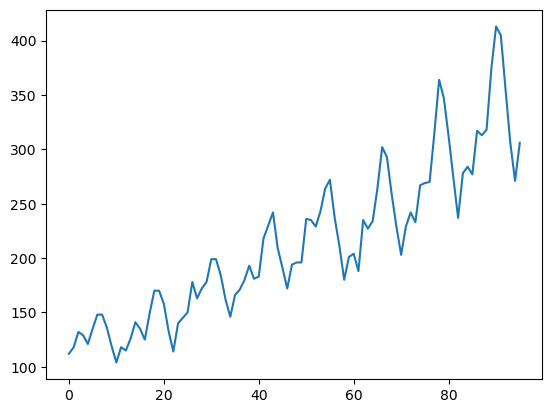

In [95]:
df['Passengers'].plot()



In [96]:
df["month"] = df['Month'].dt.strftime("%b") # month extraction
df["year"] = df['Month'].dt.strftime("%Y") # yea


In [97]:
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [98]:
mp = pd.pivot_table(data = df,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
mp


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='year', ylabel='Passengers'>

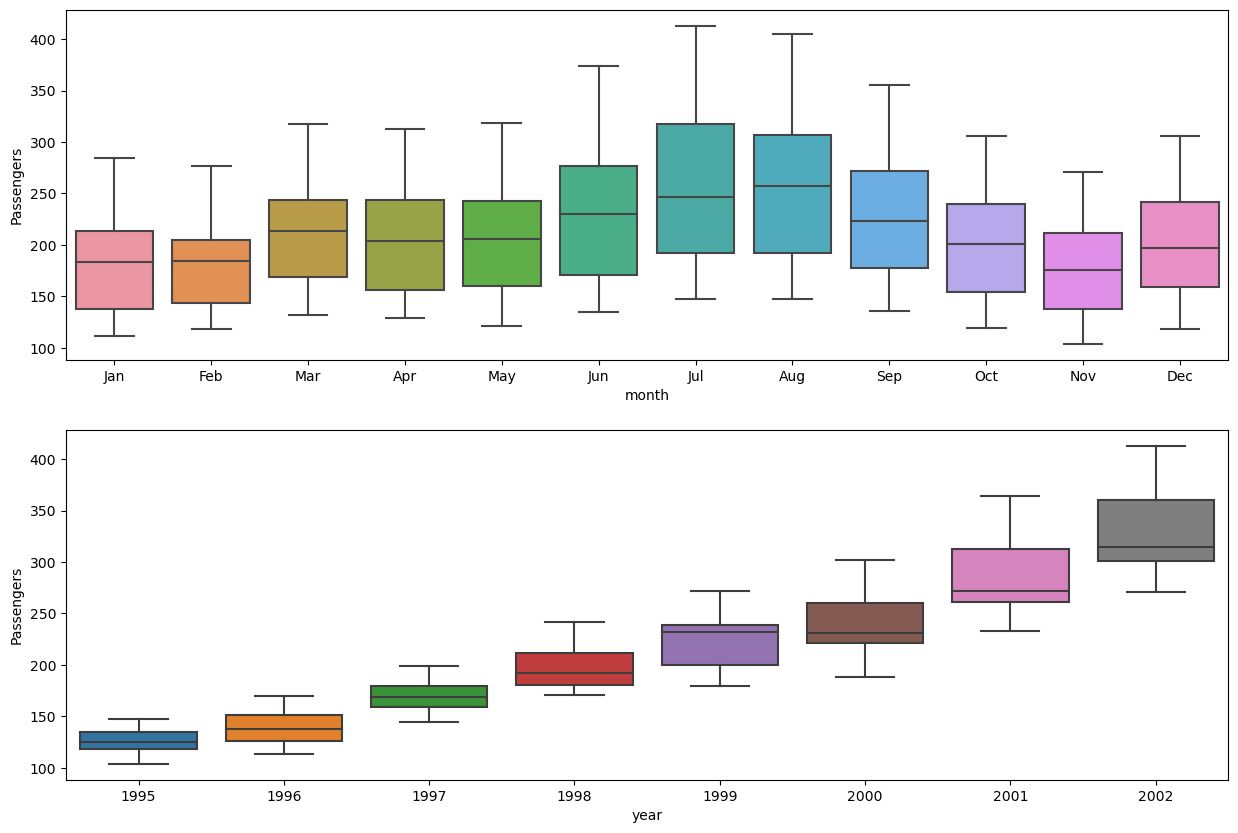

In [99]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)



IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

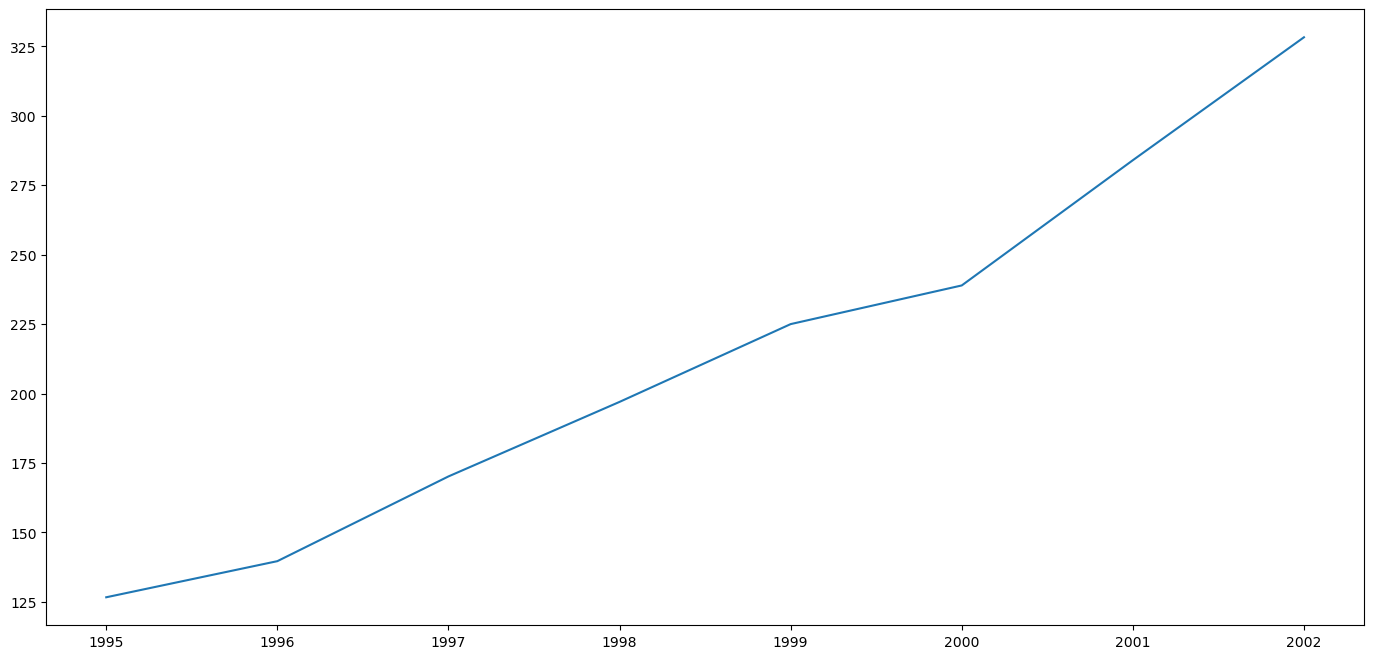

In [105]:
plt.figure(figsize=(17,8))
sns.lineplot(x="year",y="Passengers",data=df)


In [106]:
#Splitting data
df

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [110]:
# Complete the dataset
df['t']=np.arange(1,97)
df['t_square']=np.square(df.t)
df['log_Passengers']=np.log(df.Passengers)
df2=pd.get_dummies(df['month'])
df

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [111]:
df2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [112]:
df=pd.concat([df,df2],axis=1)
df


,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [113]:
# For self understanding of forecasting values data split into multiples of 12
Train = df.head(84)
Test = df.tail(12)


In [114]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [115]:
Train


,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear



53.19923653480271

In [117]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


46.05736110315635

In [118]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933193

In [119]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [120]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612095467

In [121]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708626

In [122]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea


10.519172544323675

In [123]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.73121052134104

In [124]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [127]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df).fit()
model_full

In [130]:
pred_new  = pd.Series(model_full.predict(df))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

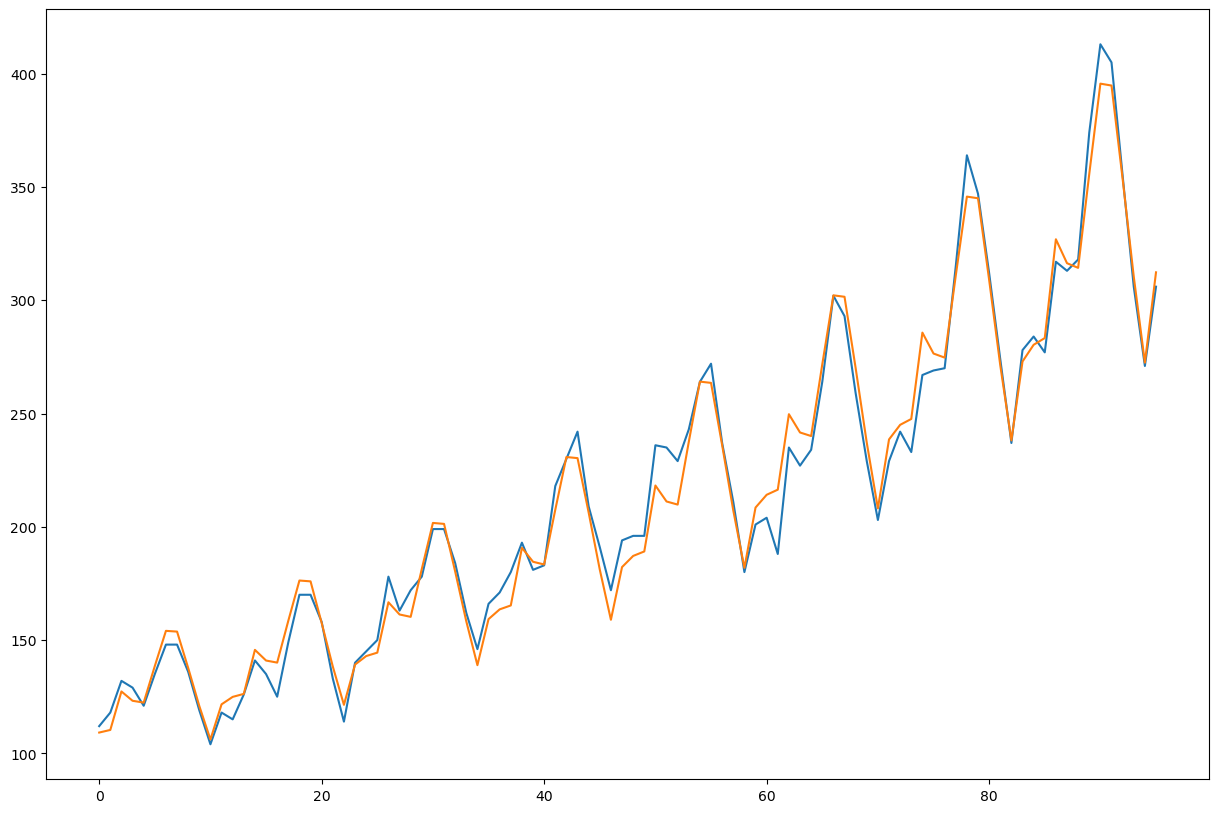

In [133]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))
plt.figure(figsize=(15,10))
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))

In [134]:
#Splitting data
df=pd.read_excel("Airlines+Data.xlsx")
Train = df.head(84)
Test = df.tail(12)
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [135]:
Test


,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


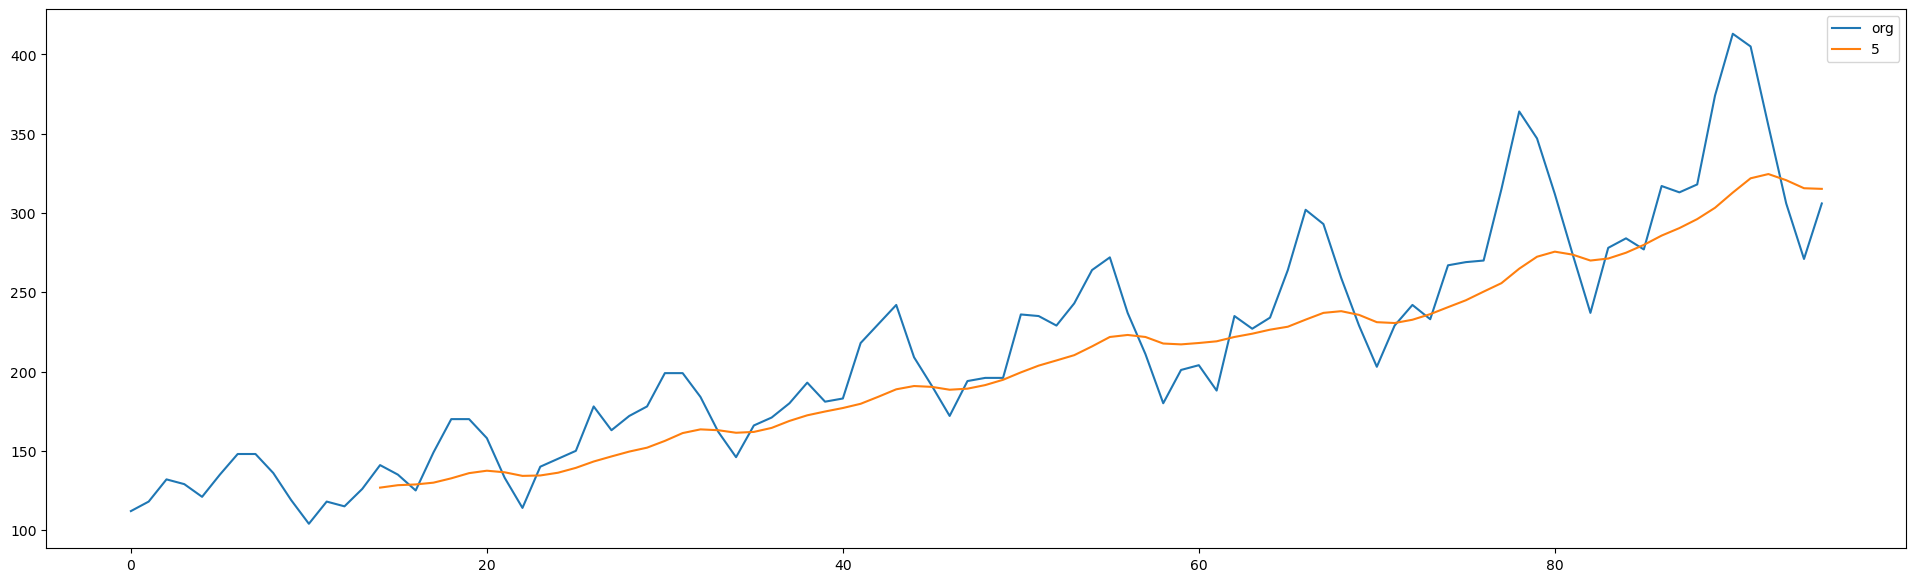

In [136]:
#Moving Average
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="org")
df["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')


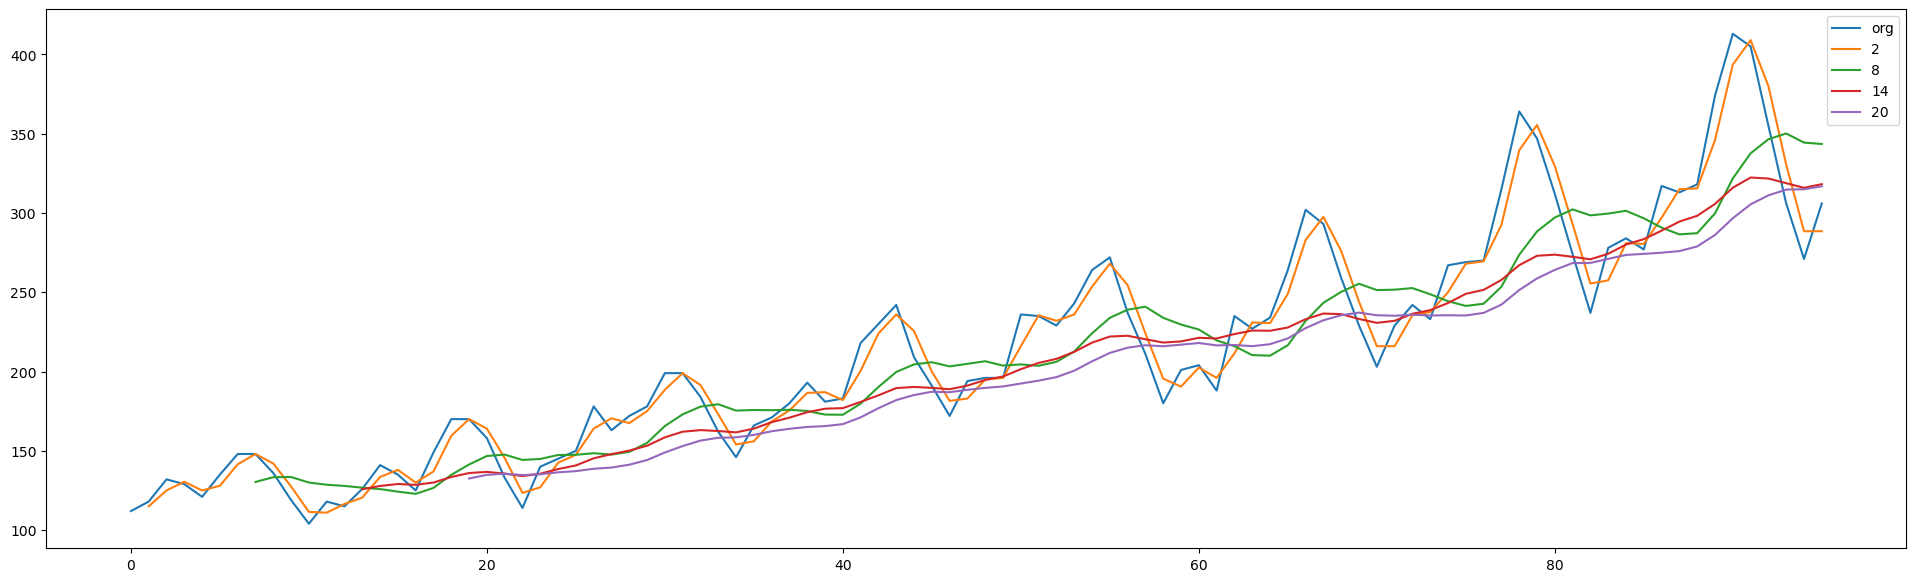

In [139]:
plt.figure(figsize=(24,7))
df['Passengers'].plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


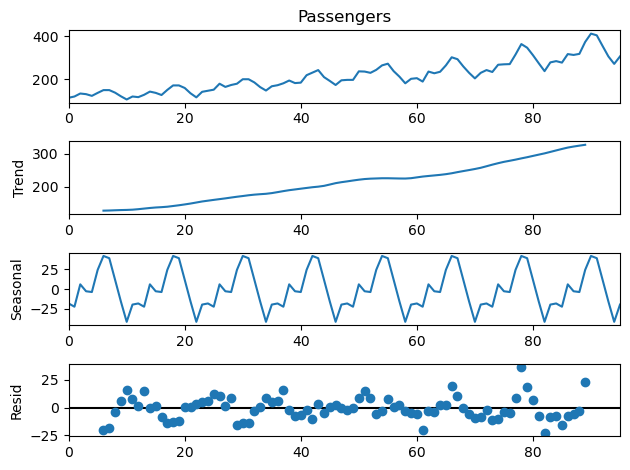

In [141]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(df['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

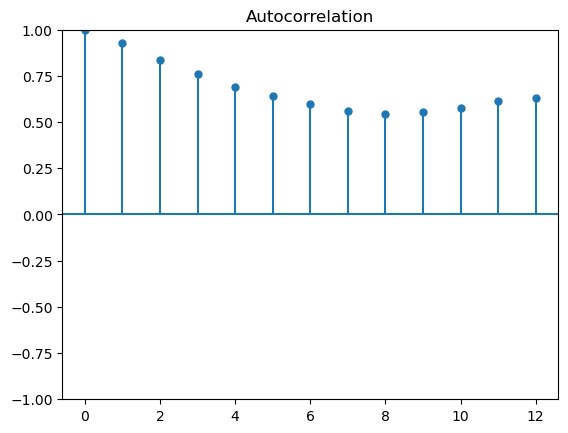

In [142]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

In [143]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [144]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.411274740513823

In [145]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 


C:\Users\RAMA KRISHNA\AppData\Local\Temp\ipykernel_2396\2137109008.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.53071965210063

In [147]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730704946852847

In [148]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821093186644687

In [150]:
#Final Model by combining train and test
hwe_model_mul_add = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
106    290.625519
107    330.590176
dtype: float64

In [152]:
#Forecasting using Auto ARIMA model
import statsmodels.tsa.seasonal
!pip install pmdarima
from pmdarima import auto_arima
df=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
df

     ------------------------------------ 572.7/572.7 kB 428.7 kB/s eta 0:00:00


,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

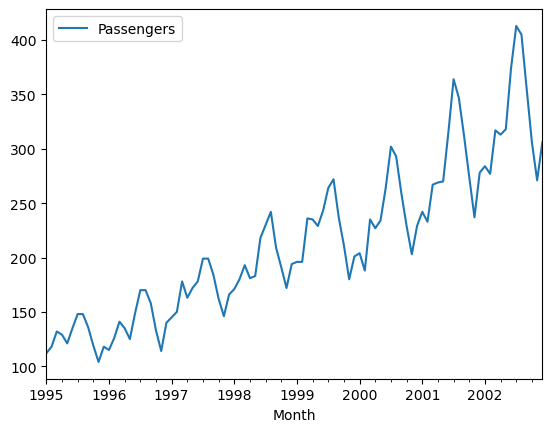

In [153]:
df.plot()

In [154]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

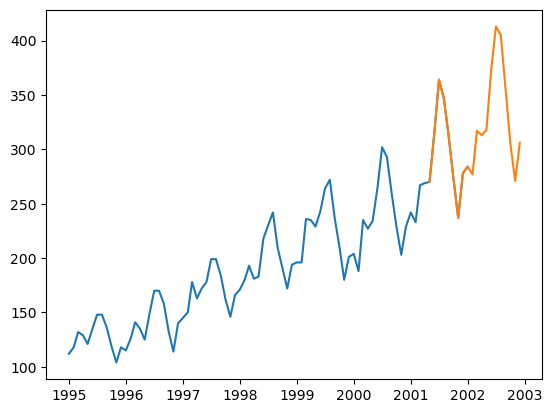

In [155]:
train =df[:85]
test = df[-20:]
plt.plot(train)
plt.plot(test)

In [156]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [157]:
arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Mon, 22 May 2023   AIC                            537.388
Time:                                     19:35:15   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction


,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


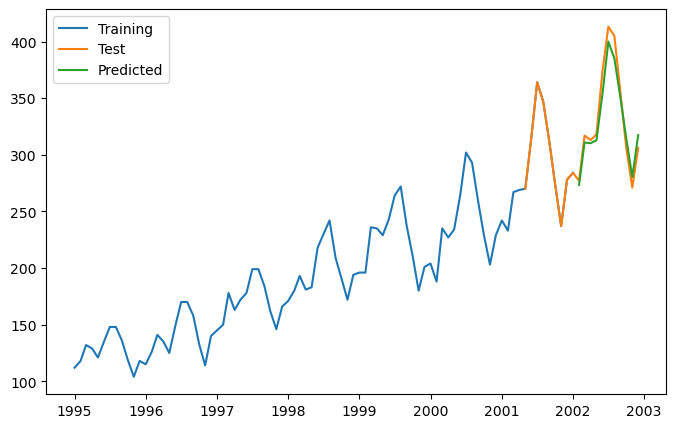

In [159]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()
